# Linear Regression. Logistics Regression.

In [12]:
import numpy as np
from scipy import stats
import pylab

In [5]:
s = np.array([27, 37, 42, 48, 57, 56, 77, 80])
p = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])

In [6]:
n = 8

b1 = (n*np.sum(p*s)-np.sum(s)*np.sum(p))/(n* np.sum(s**2)-np.sum(s)**2)
b1

0.03874584717607981

In [8]:
# another way
b1 = (np.mean(s*p) - np.mean(s) * np.mean(p)) / (np.mean(s**2) - np.mean(s)**2)
b0 = np.mean(p) - b1 * np.mean(s)

y_pred = b0 + b1 * s
y_pred

array([1.21760797, 1.60506645, 1.79879568, 2.03127076, 2.37998339,
       2.34123754, 3.15490033, 3.27113787])

In [9]:
resid = p - y_pred
resid

array([-0.01760797, -0.00506645,  0.00120432, -0.23127076,  0.12001661,
        0.25876246, -0.15490033,  0.02886213])

In [10]:
stats.shapiro(resid)

ShapiroResult(statistic=0.9600728412338091, pvalue=0.8107934979656635)

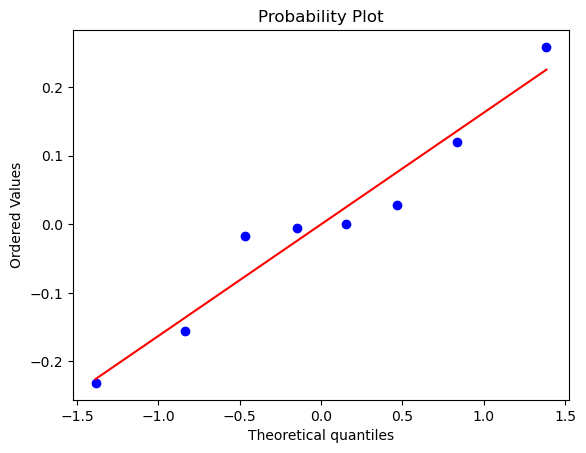

In [13]:
stats.probplot(resid, dist='norm', plot=pylab)
pylab.show();

In [15]:
mse = ((p - y_pred)**2).sum() / n
mse

0.020001557308970096

In [16]:
# Matrix

x = s.reshape(8, 1)
x

array([[27],
       [37],
       [42],
       [48],
       [57],
       [56],
       [77],
       [80]])

In [17]:
y = p.reshape(8, 1)
y

array([[1.2],
       [1.6],
       [1.8],
       [1.8],
       [2.5],
       [2.6],
       [3. ],
       [3.3]])

In [18]:
X = np.hstack([np.ones((8, 1)), x])
X

array([[ 1., 27.],
       [ 1., 37.],
       [ 1., 42.],
       [ 1., 48.],
       [ 1., 57.],
       [ 1., 56.],
       [ 1., 77.],
       [ 1., 80.]])

In [19]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
B

array([[0.1714701 ],
       [0.03874585]])

In [20]:
# Градиентный спуск
x = np.array([27, 37, 42, 48, 57, 56, 77, 80])
y = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])

def mse_(B1, y = y, x = x, n = 8):
    return np.sum((B1 * x - y)**2) / n

alpha = 1e-6

#mse = 1/n * np.sum((B1 * x - y)**2)
#mse = (2/n) * np.sum((B1 * X - y) * X)

B1 = 0.1
n = 8

for i in range(10):
    B1 -= alpha * (2/n) * np.sum((B1 * x - y) * x)
    print('B1 = {}'.format(B1))

B1 = 0.09963717500000001
B1 = 0.0992766067715
B1 = 0.09891828127738128
B1 = 0.09856218456783597
B1 = 0.09820830277982404
B1 = 0.09785662213653352
B1 = 0.09750712894684428
B1 = 0.09715980960479491
B1 = 0.09681465058905309
B1 = 0.09647163846238918


In [22]:
for i in range(3000):
    B1 -= alpha * (2/n) * np.sum((B1 * x - y) * x)
    if i % 500 == 0:
        print('Iteration = {i}, B1 = {B1}, mse = {mse}'.format(i = i, B1 = B1, mse = mse_(B1)))

Iteration = 0, B1 = 0.041668006835310197, mse = 0.0228472166398719
Iteration = 500, B1 = 0.04166800644873233, mse = 0.022847216639871368
Iteration = 1000, B1 = 0.04166800643165722, mse = 0.02284721663987141
Iteration = 1500, B1 = 0.041668006430903036, mse = 0.022847216639871364
Iteration = 2000, B1 = 0.04166800643086973, mse = 0.022847216639871364
Iteration = 2500, B1 = 0.04166800643086872, mse = 0.022847216639871392


In [23]:
mse_(0.041668)

0.022847216640000008

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression() # set up a model of linear regression

# creating an array s two-d atribute reshape(-1, 1)
s = s.reshape(-1, 1)
s

array([[27],
       [37],
       [42],
       [48],
       [57],
       [56],
       [77],
       [80]])

In [26]:
regres = model.fit(s, p) # finding coefficients

print(regres.intercept_) # intercept's output

print(regres.coef_) # coefficient's output

0.17147009966777427
[0.03874585]


In [27]:
# predict function
y_pred = model.predict(s) # adding squaremtrs into the model and calculating prices' prediction
y_pred

array([1.21760797, 1.60506645, 1.79879568, 2.03127076, 2.37998339,
       2.34123754, 3.15490033, 3.27113787])

In [28]:
import pandas as pd

In [29]:
df = pd.DataFrame({'real': p, 'predicted': y_pred})
df

,real,predicted
0,1.2,1.217608
1,1.6,1.605066
2,1.8,1.798796
3,1.8,2.031271
4,2.5,2.379983
5,2.6,2.341238
6,3.0,3.154900
7,3.3,3.271138


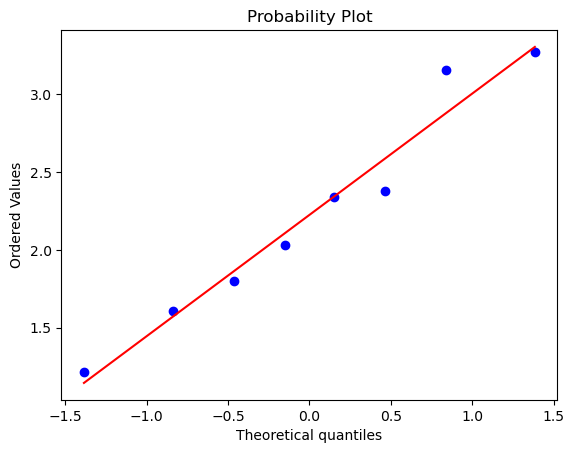

In [30]:
stats.probplot(y_pred, dist='norm', plot=pylab)
pylab.show();

In [32]:
s = np.array([27, 37, 42, 48, 57, 56, 77, 80])
p = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])
r = np.corrcoef(s, p)[1, 0]
r

0.9785768205829909

In [33]:
r**2

0.9576125937823151

In [35]:
s = s.reshape(-1, 1)
regres.score(s, p)

0.9576125937823151

In [36]:
stats.f.ppf(1 - 0.05, 1, 6)

5.987377607273699

In [38]:
# критерий Фишера F= Msf / Ms0
# В свою очередь Msf (фактическая сумма квадратных отклонений на одну степень свободы)
# Msf = SSf / df1

# остаточная сумма квадратных отклонений на 1 степень свободы
# Ms0 = SSo / df2

# df1 - степень свободы числителя df1 = р - 1, где р - число параметров (у нас площадь и цена, т.е. 2)
# df2 - степень свободы знаменателя df2 = n - p, где n - число парных измерений (у нас 8)

# SSf - сумма квадратичных отклонений фактически
# SSo - сумма квадратичных отклонений остаточная

df1 = 2 - 1
df2 = 8 - 2

SSf = np.sum((y_pred - np.mean(p))**2)

SSo = np.sum((p - y_pred) ** 2)

Msf = SSf / df1

Mso = SSo / df2

F = Msf / Mso

print(f'SSf = {SSf}, SSo = {SSo}, Msf = {Msf}, Mso = {Mso}, F = {F}')

SSf = 3.614987541528238, SSo = 0.1600124584717606, Msf = 3.614987541528238, Mso = 0.026668743078626767, F = 135.55147803067672


In [39]:
# T-criterion
stats.t.ppf(1 - 0.025, 6)

2.4469118511449692

In [40]:
sb = np.sqrt(Mso / np.sum((s - np.mean(s))**2))
s0 = np.sqrt((Mso * np.sum(s**2)) / (n * np.sum((s - np.mean(s))**2)))
# standard coefficients' errors
sb, s0

(0.0033279211856704735, 0.18558942531859646)

In [41]:
tb = b1 / sb
tb

11.642657687601973

In [42]:
t0 = b0 / s0
t0

0.9239217125297502